# Limit
<hr style="border-top-width: 4px; border-top-color: #34609b;">
This program demonstrates the computation of 95 % C.L. limits.
It uses a set of randomly created histograms.




**Author:** Christophe Delaere  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Thursday, January 19, 2017 at 04:32 PM.</small></i>

In [1]:
%%cpp -d
#include <iostream>
#include "TH1.h"
#include "THStack.h"
#include "TCanvas.h"
#include "TFrame.h"
#include "TRandom2.h"
#include "TSystem.h"
#include "TVector.h"
#include "TObjArray.h"
#include "TLimit.h"
#include "TLimitDataSource.h"
#include "TConfidenceLevel.h"

using std::cout;
using std::endl;

Create a new canvas.

In [2]:
TCanvas *c1 = new TCanvas("c1","Dynamic Filling Example",200,10,700,500);
c1->SetFillColor(42);

Create some histograms

In [3]:
TH1D* backgroundHist = new TH1D("background","The expected background",30,-4,4);
TH1D* signalHist     = new TH1D("signal","the expected signal",30,-4,4);
TH1D* dataHist       = new TH1D("data","some fake data points",30,-4,4);
backgroundHist->SetFillColor(48);
signalHist->SetFillColor(41);
dataHist->SetMarkerStyle(21);
dataHist->SetMarkerColor(kBlue);
backgroundHist->Sumw2(); // needed for stat uncertainty
signalHist->Sumw2(); // needed for stat uncertainty

Fill histograms randomly

In [4]:
TRandom2 r;
Float_t bg,sig,dt;
for (Int_t i = 0; i < 25000; i++) {
   bg  = r.Gaus(0,1);
   sig = r.Gaus(1,.2);
   backgroundHist->Fill(bg,0.02);
   signalHist->Fill(sig,0.001);
}
for (Int_t i = 0; i < 500; i++) {
   dt = r.Gaus(0,1);
   dataHist->Fill(dt);
}
THStack *hs = new THStack("hs","Signal and background compared to data...");
hs->Add(backgroundHist);
hs->Add(signalHist);
hs->Draw("hist");
dataHist->Draw("PE1,Same");
c1->Modified();
c1->Update();
c1->GetFrame()->SetFillColor(21);
c1->GetFrame()->SetBorderSize(6);
c1->GetFrame()->SetBorderMode(-1);
c1->Modified();
c1->Update();
gSystem->ProcessEvents();

Compute the limits

In [5]:
cout << "Computing limits... " << endl;
TLimitDataSource* mydatasource = new TLimitDataSource(signalHist,backgroundHist,dataHist);
TConfidenceLevel *myconfidence = TLimit::ComputeLimit(mydatasource,50000);
cout << "CLs    : "   << myconfidence->CLs()  << endl;
cout << "CLsb   : "   << myconfidence->CLsb() << endl;
cout << "CLb    : "   << myconfidence->CLb()  << endl;
cout << "< CLs >  : " << myconfidence->GetExpectedCLs_b()  << endl;
cout << "< CLsb > : " << myconfidence->GetExpectedCLsb_b() << endl;
cout << "< CLb >  : " << myconfidence->GetExpectedCLb_b()  << endl;

Computing limits... 
CLs    : 0.0179535
CLsb   : 0.00930313
CLb    : 0.51818
< CLs >  : 0.0165344
< CLsb > : 0.00826754
< CLb >  : 0.50002


Add stat uncertainty

In [6]:
cout << endl << "Computing limits with stat systematics... " << endl;
TConfidenceLevel *mystatconfidence = TLimit::ComputeLimit(mydatasource,50000,true);
cout << "CLs    : "   << mystatconfidence->CLs()  << endl;
cout << "CLsb   : "   << mystatconfidence->CLsb() << endl;
cout << "CLb    : "   << mystatconfidence->CLb()  << endl;
cout << "< CLs >  : " << mystatconfidence->GetExpectedCLs_b()  << endl;
cout << "< CLsb > : " << mystatconfidence->GetExpectedCLsb_b() << endl;
cout << "< CLb >  : " << mystatconfidence->GetExpectedCLb_b()  << endl;


Computing limits with stat systematics... 
CLs    : 0.0189723
CLsb   : 0.00989482
CLb    : 0.52154
< CLs >  : 0.0172591
< CLsb > : 0.00862989
< CLb >  : 0.50002


Add some systematics

In [7]:
cout << endl << "Computing limits with systematics... " << endl;
TVectorD errorb(2);
TVectorD errors(2);
TObjArray* names = new TObjArray();
TObjString name1("bg uncertainty");
TObjString name2("sig uncertainty");
names->AddLast(&name1);
names->AddLast(&name2);
errorb[0]=0.05; // error source 1: 5%
errorb[1]=0;    // error source 2: 0%
errors[0]=0;    // error source 1: 0%
errors[1]=0.01; // error source 2: 1%
TLimitDataSource* mynewdatasource  = new TLimitDataSource();
mynewdatasource->AddChannel(signalHist,backgroundHist,dataHist,&errors,&errorb,names);
TConfidenceLevel *mynewconfidence = TLimit::ComputeLimit(mynewdatasource,50000,true);
cout << "CLs    : " << mynewconfidence->CLs()  << endl;
cout << "CLsb   : " << mynewconfidence->CLsb() << endl;
cout << "CLb    : " << mynewconfidence->CLb()  << endl;
cout << "< CLs >  : " << mynewconfidence->GetExpectedCLs_b()  << endl;
cout << "< CLsb > : " << mynewconfidence->GetExpectedCLsb_b() << endl;
cout << "< CLb >  : " << mynewconfidence->GetExpectedCLb_b()  << endl;


Computing limits with systematics... 
CLs    : 0.0352037
CLsb   : 0.0184327
CLb    : 0.5236
< CLs >  : 0.0328702
< CLsb > : 0.0164358
< CLb >  : 0.50002


Show canonical -2lnq plots in a new canvas
 - The histogram of -2lnQ for background hypothesis (full)
 - The histogram of -2lnQ for signal and background hypothesis (dashed)

In [8]:
TCanvas *c2 = new TCanvas("c2");
myconfidence->Draw();

Clean up (except histograms and canvas)

In [9]:
delete myconfidence;
delete mydatasource;
delete mystatconfidence;
delete mynewconfidence;
delete mynewdatasource;

Draw all canvases 

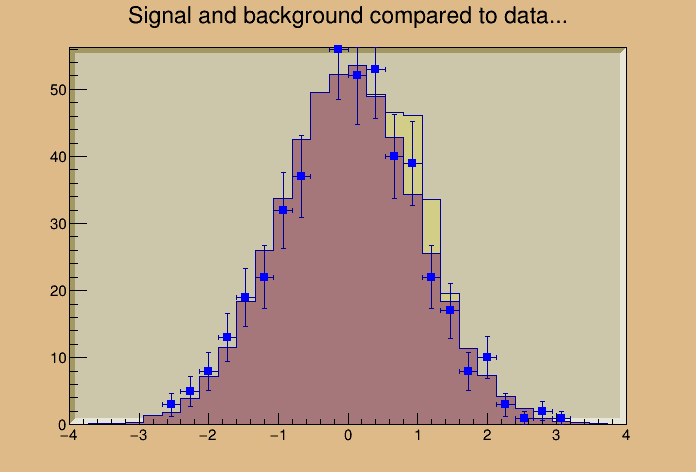

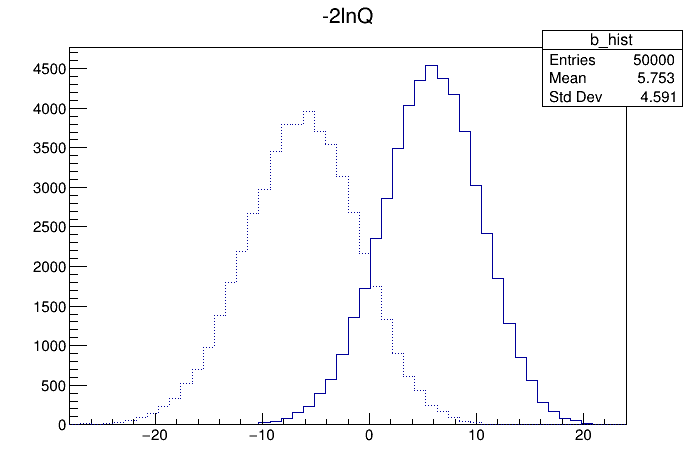

In [10]:
gROOT->GetListOfCanvases()->Draw()